# Importing Python Libraries

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading Dataset

In [ ]:
#Importing the data and storing it in variable df
df=pd.read_csv(r"/content/retail_sales.csv")

In [ ]:
#For viewing the top 5 observations of the dataframe
df.head()

,Date,Sales
0,1/1/15 0:00,54.048619
1,1/1/15 1:00,50.161596
2,1/1/15 2:00,55.954939
3,1/1/15 3:00,56.553261
4,1/1/15 4:00,60.487874


In [ ]:
#For Viewing the last 5 observations of the dataframe
df.tail()

,Date,Sales
52580,30/12/20 20:00,140.946779
52581,30/12/20 21:00,145.561324
52582,30/12/20 22:00,144.484071
52583,30/12/20 23:00,147.890291
52584,31/12/20 0:00,150.223487


In [ ]:
#To return a tuple representing the dimensions of the DataFrame
df.shape

(52585, 2)

In [ ]:
#For viewing a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52585 entries, 0 to 52584
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52585 non-null  object 
 1   Sales   52585 non-null  float64
dtypes: float64(1), object(1)
memory usage: 821.8+ KB


# Data Wrangling

In [ ]:
#To return a column labels of the DataFrame
df.columns

Index(['Date', 'Sales'], dtype='object')

In [ ]:
#With Strip function removing unwanted space from 'Date' column
df['Date']=df['Date'].str.strip()

In [ ]:
# Convert 'Date' to datetime format with explicit format specification
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y %H:%M')

In [ ]:
# Extract date components
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Hour'] = df['Date'].dt.hour
df['Minute'] = df['Date'].dt.minute
df['Second'] = df['Date'].dt.second

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52585 entries, 0 to 52584
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    52585 non-null  datetime64[ns]
 1   Sales   52585 non-null  float64       
 2   Day     52585 non-null  int32         
 3   Month   52585 non-null  int32         
 4   Year    52585 non-null  int32         
 5   Hour    52585 non-null  int32         
 6   Minute  52585 non-null  int32         
 7   Second  52585 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(6)
memory usage: 2.0 MB


In [ ]:
df

,Date,Sales,Day,Month,Year,Hour,Minute,Second
0,2015-01-01 00:00:00,54.048619,1,1,2015,0,0,0
1,2015-01-01 01:00:00,50.161596,1,1,2015,1,0,0
2,2015-01-01 02:00:00,55.954939,1,1,2015,2,0,0
3,2015-01-01 03:00:00,56.553261,1,1,2015,3,0,0
4,2015-01-01 04:00:00,60.487874,1,1,2015,4,0,0
...,...,...,...,...,...,...,...,...
52580,2020-12-30 20:00:00,140.946779,30,12,2020,20,0,0
52581,2020-12-30 21:00:00,145.561324,30,12,2020,21,0,0
52582,2020-12-30 22:00:00,144.484071,30,12,2020,22,0,0
52583,2020-12-30 23:00:00,147.890291,30,12,2020,23,0,0


In [ ]:
df.drop("Date",axis=1,inplace=True)

In [ ]:
df

,Sales,Day,Month,Year,Hour,Minute,Second
0,54.048619,1,1,2015,0,0,0
1,50.161596,1,1,2015,1,0,0
2,55.954939,1,1,2015,2,0,0
3,56.553261,1,1,2015,3,0,0
4,60.487874,1,1,2015,4,0,0
...,...,...,...,...,...,...,...
52580,140.946779,30,12,2020,20,0,0
52581,145.561324,30,12,2020,21,0,0
52582,144.484071,30,12,2020,22,0,0
52583,147.890291,30,12,2020,23,0,0


In [ ]:
# Rearrange columns
df = df[['Day','Month', 'Year','Hour', 'Minute','Second','Sales']]

In [ ]:
df

,Day,Month,Year,Hour,Minute,Second,Sales
0,1,1,2015,0,0,0,54.048619
1,1,1,2015,1,0,0,50.161596
2,1,1,2015,2,0,0,55.954939
3,1,1,2015,3,0,0,56.553261
4,1,1,2015,4,0,0,60.487874
...,...,...,...,...,...,...,...
52580,30,12,2020,20,0,0,140.946779
52581,30,12,2020,21,0,0,145.561324
52582,30,12,2020,22,0,0,144.484071
52583,30,12,2020,23,0,0,147.890291


# Missing Values Identification & Imputation

In [ ]:
#To find Null value count of each columns in dataframe
df.isnull().sum()

Day       0
Month     0
Year      0
Hour      0
Minute    0
Second    0
Sales     0
dtype: int64

# Checking for Duplicate observation

In [ ]:
#Checking for Duplicate rows
duplicate_rows = df.duplicated().sum()

In [ ]:
duplicate_rows

0

# Statistics Summary

In [ ]:
#To provide statistical summary of the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Day,52585.0,15.725986,8.797583,1.000000,8.000000,16.000000,23.000000,31.000000
Month,52585.0,6.519502,3.447869,1.000000,4.000000,7.000000,10.000000,12.000000
Year,52585.0,2017.499363,1.707771,2015.000000,2016.000000,2017.000000,2019.000000,2020.000000
Hour,52585.0,11.499781,6.922368,0.000000,5.000000,11.000000,17.000000,23.000000
Minute,52585.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Second,52585.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sales,52585.0,99.997488,29.957815,32.790074,75.017795,99.930643,124.990608,168.107281


# Data Visualization

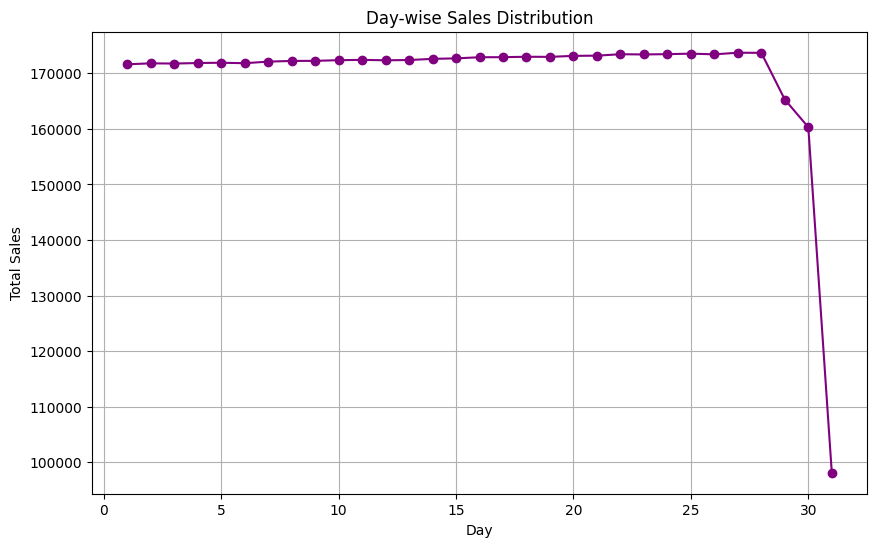

In [ ]:
Day_sales = df.groupby('Day')['Sales'].sum()
plt.figure(figsize=(10, 6))
Day_sales.plot(kind='line', marker='o', linestyle='-', color='purple')
plt.title('Day-wise Sales Distribution')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

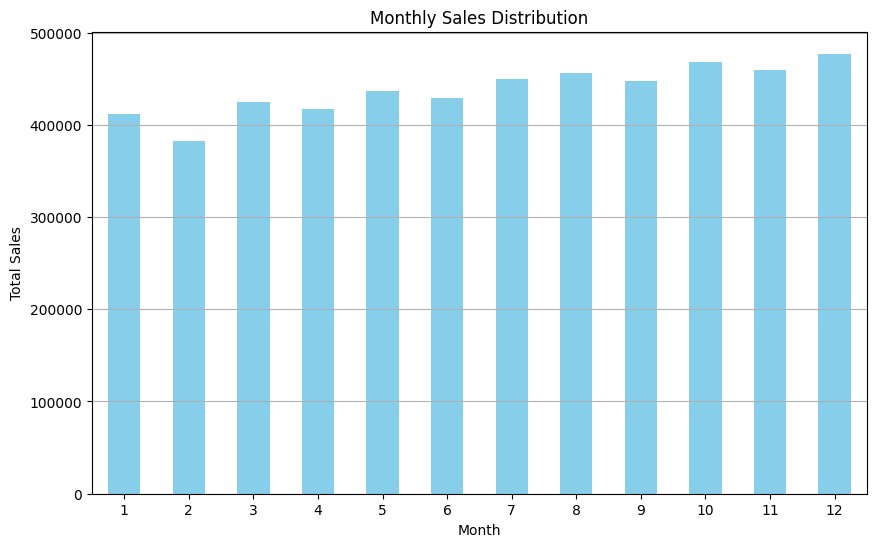

In [ ]:
monthly_sales = df.groupby('Month')['Sales'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales Distribution')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

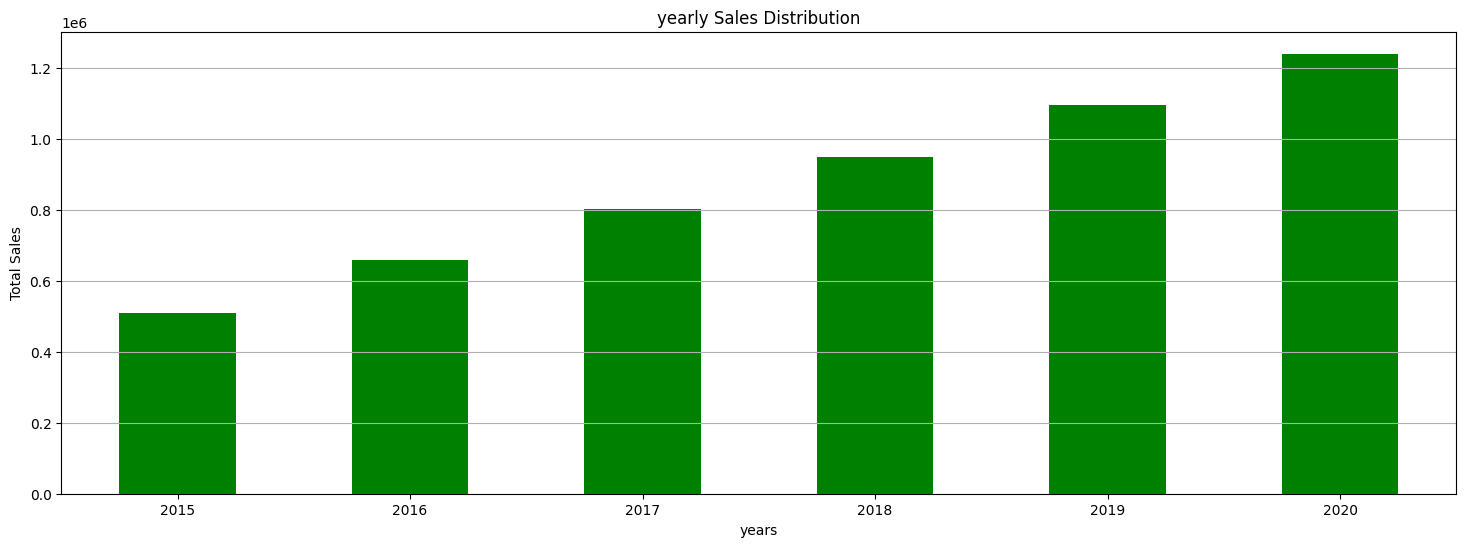

In [ ]:
yearly_sales = df.groupby('Year')['Sales'].sum()
plt.figure(figsize=(18, 6))
yearly_sales.plot(kind='bar', color='green')
plt.title('yearly Sales Distribution')
plt.xlabel('years')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

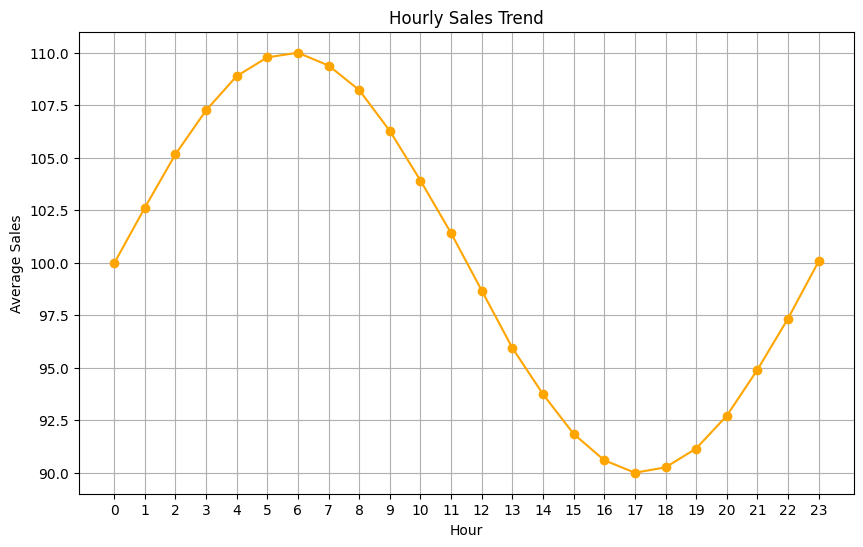

In [ ]:
hourly_sales = df.groupby('Hour')['Sales'].mean()
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='line', marker='o', linestyle='-', color='orange')
plt.title('Hourly Sales Trend')
plt.xlabel('Hour')
plt.ylabel('Average Sales')
plt.xticks(hourly_sales.index)
plt.grid(True)
plt.show()

# Data Splitting

In [ ]:
X=df.drop("Sales", axis=1)

In [ ]:
y=df["Sales"]

In [ ]:
X.shape

(52585, 6)

In [ ]:
y.shape

(52585,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)

In [ ]:
X_train.shape

(42068, 6)

In [ ]:
X_test.shape

(10517, 6)

# Multicollinearity Identification

<Axes: >

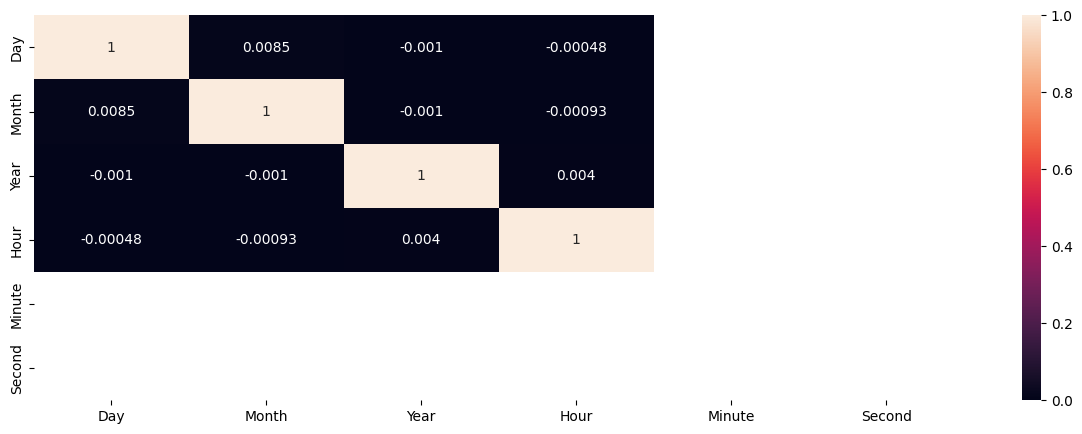

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(X_train.corr(),annot=True)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sd=StandardScaler()

In [ ]:
X_train=sd.fit_transform(X_train)
X_test=sd.transform(X_test)

# Model Selection and Implementation

In [ ]:
import tensorflow

In [ ]:
from keras import Sequential

In [ ]:
from keras.layers import Dense
model = Sequential()

In [ ]:
model.add(Dense(128 , activation = "relu" , input_dim = 6)) #first hidden layer

model.add(Dense(64 , activation = "relu")) #2nd hidden layer

model.add(Dense(32 , activation = "relu")) #3rd hidden layer

model.add(Dense(16 , activation = "relu")) #4th hidden layer

model.add(Dense(8 , activation = "relu")) #5th hidden layer

model.add(Dense(4 , activation = "relu")) #6th hidden layer

model.add(Dense(2 , activation = "relu")) #7th hidden layer

model.add(Dense(1 , activation = "relu")) #Output layer

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [ ]:
model.fit(X_train,y_train,epochs = 50)

Epoch 1/50
1315/1315 [==============================] - 12s 5ms/step - loss: 800.1369 - mean_absolute_error: 13.9764
Epoch 2/50
1315/1315 [==============================] - 8s 6ms/step - loss: 24.5089 - mean_absolute_error: 4.0367
Epoch 3/50
1315/1315 [==============================] - 4s 3ms/step - loss: 18.5104 - mean_absolute_error: 3.6034
Epoch 4/50
1315/1315 [==============================] - 3s 2ms/step - loss: 18.2823 - mean_absolute_error: 3.5819
Epoch 5/50
1315/1315 [==============================] - 3s 2ms/step - loss: 18.1388 - mean_absolute_error: 3.5752
Epoch 6/50
1315/1315 [==============================] - 4s 3ms/step - loss: 18.1056 - mean_absolute_error: 3.5718
Epoch 7/50
1315/1315 [==============================] - 3s 2ms/step - loss: 18.0947 - mean_absolute_error: 3.5654
Epoch 8/50
1315/1315 [==============================] - 3s 2ms/step - loss: 18.0218 - mean_absolute_error: 3.5634
Epoch 9/50
1315/1315 [==============================] - 3s 2ms/step - loss: 18.1139 -

In [ ]:
y_pred = model.predict(X_test)

329/329 [==============================] - 1s 1ms/step


# Model Evaluation

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
print("r2_score:", r2_score(y_test, y_pred))

r2_score: 0.9807847119035634


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 17.383069413704288


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 3.510451075957592


In [ ]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 4.16930083031967
